The sentiment labels are:

- 0 - negative
- 1 - somewhat negative
- 2 - neutral
- 3 - somewhat positive
- 4 - positive

In [58]:
import numpy as np
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
# from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [24]:
df_train = pd.read_csv('train.tsv', delimiter='\t')
df_test = pd.read_csv('test.tsv', delimiter='\t')
submission = pd.read_csv('sampleSubmission.csv')

In [25]:
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [26]:
df_train.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [27]:
X = df_train['Phrase']
y = df_train['Sentiment']
# one_hot_encoded_y = pd.get_dummies(y)
  
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [28]:
df = df_train.drop(['PhraseId', 'SentenceId'], axis = 1)
df.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [29]:
negative_phrases = df[df['Sentiment'] == 0]
negative_text = " ".join(phrase for phrase in negative_phrases['Phrase'])

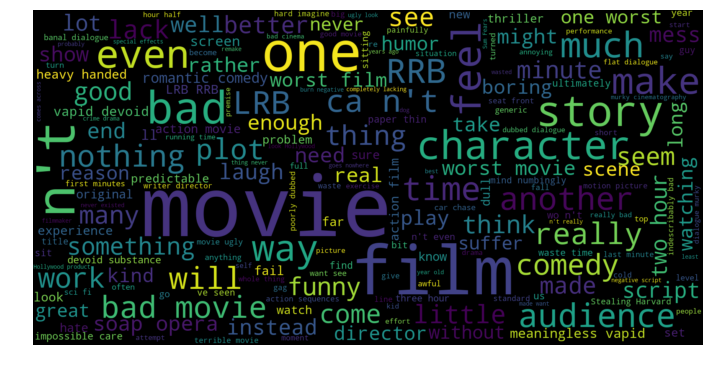

In [30]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(negative_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
positive_phrases = df[df['Sentiment'] == 4]
positive_text = " ".join(phrase for phrase in negative_phrases['Phrase'])

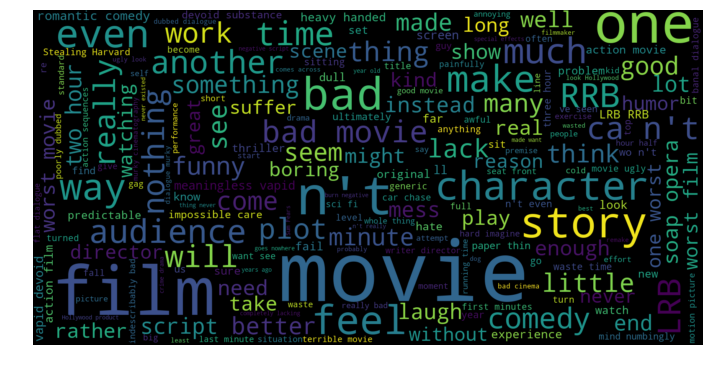

In [32]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(negative_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
# count_vectorizer = CountVectorizer()
count_vectorizer = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
count_vectorizer.fit(df['Phrase'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [34]:
len(count_vectorizer.get_feature_names())

94644

In [35]:
sentiments = ['negative', 'some-negative', 'neutral', 'some-positive', 'positive']

df_term_frequency = pd.DataFrame()

for i in range(5):
    matrix = count_vectorizer.transform(df[df['Sentiment'] == i]['Phrase'])
    words = matrix.sum(axis = 0)
    word_frequency = [(word, words[0, i]) for word, i in count_vectorizer.vocabulary_.items()]
    df_term_frequency[sentiments[i]] = list(sorted(word_frequency, key = lambda x: x[1], reverse = True))


In [36]:
df_term_frequency.head()

,negative,some-negative,neutral,some-positive,positive
0,"(the, 3462)","(the, 10885)","(the, 20619)","(the, 12459)","(the, 4208)"
1,"(and, 2549)","(of, 6660)","(of, 12287)","(and, 9180)","(and, 4003)"
2,"(of, 2277)","(and, 6204)","(and, 10241)","(of, 8405)","(of, 3073)"
3,"(to, 1916)","(to, 5571)","(to, 8295)","(to, 5411)","(to, 1568)"
4,"(is, 1372)","(is, 3362)","(in, 5562)","(is, 3489)","(is, 1550)"


In [37]:
filtered_count_vectorizer = CountVectorizer(stop_words = 'english', max_features = 10000)
filtered_count_vectorizer.fit(df_train_1['Phrase'])

NameError: name 'df_train_1' is not defined

In [ ]:
[sentiments] = ['negative', 'some-negative', 'neutral', 'some-positive', 'positive']

filtered_df_term_frequency = pd.DataFrame()

for i in range(5):
    matrix = filtered_count_vectorizer.transform(df_train_1[df_train_1['Sentiment'] == i]['Phrase'])
    words = matrix.sum(axis = 0)
    word_frequency = [(word, words[0, i]) for word, i in filtered_count_vectorizer.vocabulary_.items()]
    filtered_df_term_frequency[sentiments[i]] = list(sorted(word_frequency, key = lambda x: x[1], reverse = True))

In [ ]:
filtered_df_term_frequency.head()

In [39]:
count_vectorizer = CountVectorizer(stop_words = 'english', max_features = 10000)
count_vectorizer_train_features = count_vectorizer.fit_transform(X_train)
count_vectorizer_val_features = count_vectorizer.transform(X_val)

In [40]:
lr = LogisticRegression()
lr.fit(count_vectorizer_train_features, y_train)
lr_predictions = lr.predict(count_vectorizer_val_features)

/home/cory/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
# sentiments = np.array(y_val).argmax(axis = 1)
# sentiments = np.argmax(y_val, axis = 1)
# predictions = np.argmax(lr_predictions, axis = 1)
# confusion_matrix(sentiments, predictions)
# print(lr_predictions[:100])
# print(y_val[:100])

78734     1
126189    0
132845    2
126239    2
30608     1
7997      2
115943    1
65699     2
17825     3
143656    0
18514     4
75943     3
53278     1
3079      3
22752     3
44868     1
15881     1
66293     4
91895     1
121996    2
27405     2
56311     3
42585     2
7935      2
82681     3
87245     2
86526     2
125153    2
95366     3
132457    2
         ..
94838     1
57216     2
29133     4
125993    2
36908     2
108563    1
138449    2
83649     2
75563     3
57039     2
52513     2
59253     2
56705     2
121828    2
130685    2
52389     1
100002    2
11005     2
5602      2
46062     2
100154    2
102019    2
42149     0
105523    2
116599    3
35482     3
74879     1
95360     2
107355    2
83611     2
Name: Sentiment, Length: 100, dtype: int64


In [51]:
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))

In [52]:
def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 

In [54]:
get_metrics(y_val, lr_predictions)
display_confusion_matrix(y_val, lr_predictions, [0, 1, 2, 3, 4])

Accuracy: 0.6267
Precision: 0.608
Recall: 0.6267
F1 Score: 0.596
          Predicted:                        
                   0     1      2     3    4
Actual: 0        361   585    427    43    3
        1        232  1731   3288   235   26
        2         40   741  14203   940   40
        3          8   156   3321  2738  331
        4          1    24    348   862  528


/home/cory/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  # Remove the CWD from sys.path while we load stuff.
/home/cory/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  if sys.path[0] == '':


In [55]:
tfidf_vectorizer = TfidfVectorizer(
    min_df = 0.0,
    max_df = 1.0,
    ngram_range = (1,2),
    sublinear_tf = True
)
tfidf_vectorizer_train_features = tfidf_vectorizer.fit_transform(X_train)
tfidf_vectorizer_val_features = tfidf_vectorizer.transform(X_val)

In [56]:
lr = LogisticRegression()
lr.fit(tfidf_vectorizer_train_features, y_train)
lr_predictions = lr.predict(tfidf_vectorizer_val_features)

In [57]:
get_metrics(y_val, lr_predictions)
display_confusion_matrix(y_val, lr_predictions, [0, 1, 2, 3, 4])

Accuracy: 0.6365
Precision: 0.6269
Recall: 0.6365
F1 Score: 0.6037
          Predicted:                        
                   0     1      2     3    4
Actual: 0        261   649    493    15    1
        1        122  1877   3394   114    5
        2         16   733  14341   853   21
        3          0    86   3305  2962  201
        4          0    13    358   967  425


/home/cory/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  # Remove the CWD from sys.path while we load stuff.
/home/cory/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  if sys.path[0] == '':


In [59]:
import re
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[-()\"#/@;:<>{}+=~|.?,]", "", text)
    review_lemma=[]
    for word in text.split():
        word_lemma = wordnet_lemmatizer.lemmatize(word)
        review_lemma.append(word_lemma)
    review_lemma=' '.join(review_lemma)
    return review_lemma

train['Phrase'] = X_train['Phrase'].apply(clean_text)
test['Phrase'] = y_train['Phrase'].apply(clean_text)

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

MAX_REVIEW_LENGTH = 49
FEATURE_LENGTH = 12011
BATCH_SIZE = 1000
EPOCHS = 10
NUM_CLASSES = 5

tokenizer = Tokenizer(num_words = FEATURE_LENGTH)
tokenizer.fit_on_texts(list(np.concatenate((train_text, test_text), axis=0)))
X_train = tokenizer.texts_to_sequences(X_train_text)
X_test = tokenizer.texts_to_sequences(test_text)

X_train = pad_sequences(X_train, maxlen=MAX_REVIEW_LENGTH)
X_test= pad_sequences(X_test, maxlen=MAX_REVIEW_LENGTH)

model=Sequential()
model.add(Embedding(FEATURE_LENGTH,250,mask_zero=True))
model.add(LSTM(128,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
model.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(NUM_CLASSES,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = EPOCHS,
    batch_size=BATCH_SIZE,
    verbose = 1
)
y_pred = model.predict_classes(X_test)

Using TensorFlow backend.


NameError: name 'train_text' is not defined

In [122]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from tensorflow import set_random_seed
from keras.layers import Dense, LSTM

seed = 0
np.random.seed(seed)
set_random_seed(seed)

Using TensorFlow backend.


In [123]:
    def format_data(train, test, max_features, maxlen):
        train = train.sample(frac=1).reset_index(drop=True)
        train['Phrase'] = train['Phrase'].apply(lambda x: x.lower())
        test['Phrase'] = test['Phrase'].apply(lambda x: x.lower())

        X = train['Phrase']
        test_X = test['Phrase']
        Y = to_categorical(train['Sentiment'].values)

        tokenizer = Tokenizer(num_words = max_features)
        tokenizer.fit_on_texts(list(X))

        X = tokenizer.texts_to_sequences(X)
        X = pad_sequences(X, maxlen=maxlen)
        test_X = tokenizer.texts_to_sequences(test_X)
        # https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do
        test_X = pad_sequences(test_X, maxlen=maxlen)

        return X, Y, test_X

In [120]:
maxlen = 125
max_features = 10000

X, Y, test_X = format_data(train, test, max_features, maxlen)

NameError: name 'train' is not defined

In [121]:
model = Sequential()

model.add(Embedding(max_features, 100, mask_zero = True))
model.add(LSTM(64, dropout = 0.4, recurrent_dropout = 0.4, return_sequences = True))
model.add(LSTM(32, dropout = 0.5, recurrent_dropout = 0.5, return_sequences = False))
model.add(Dense(5, activation = 'softmax'))
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(lr = 0.001),
    metrics = ['accuracy']
)

NameError: name 'Sequential' is not defined

In [ ]:
epochs = 5
batch_size = 32

In [ ]:
model.fit(
    X_train, 
    Y_train, 
    validation_data=(X_val, Y_val),
    epochs=epochs, 
    batch_size=batch_size,
    verbose=1
)